## Similarity Calculation Functions 

In [19]:
import pandas as pd
import importlib
import libcomp as lc
importlib.reload(lc)

library_file = 'RelabDatabase2022Dec31_mini/Library_Mineral_BD-VNIR.csv'
sample_catalogue_file = 'RelabDatabase2022Dec31_mini/catalogues/Sample_Catalogue.xlsx'
target_spectrum_file = './data/frt00003621_07_if166l_E_-97.57339 N_24.96872.csv'

interp_type = 'liner'
scaling_type = 'st'
sim_type = 'pcc'

comparer = lc.LibraryComparison(library_file, sample_catalogue_file, target_spectrum_file) 

# comparer.slice_wav(100, 200)  # Target band range (index)
comparer.interpolate(interp_type)
comparer.scaling(scaling_type)
comparer.measure_similarity(sim_type)
comparer.result()

  0%|          | 0/6359 [00:00<?, ? count/s]

>>> Library loading completed.



  0%|          | 0/6359 [00:00<?, ? count/s]

>>> Interpolation completed.



  0%|          | 0/6359 [00:00<?, ? count/s]

>>> Scaling completed.



  0%|          | 0/6359 [00:00<?, ? count/s]

>>> Similarity measurement completed.



,SpectrumID,SampleID,pcc,Band,Min Wavelength,Max Wavelength,SubType
0,target,target,1.000000,437,1.00135,3.93682,target
1,c1aa01,AA-A1S-001,0.255497,237,1.00135,2.55000,Mica Annite Fayalite Quartz
2,c1aa02,AA-A1S-002,0.509009,237,1.00135,2.55000,Mica Annite Fayalite Quartz Spinel
3,c1aa03,AA-A1S-003,0.300801,237,1.00135,2.55000,Mica Annite Fayalite
4,c1aa04,AA-A1S-004,0.104662,237,1.00135,2.55000,Mica Ni-Annite Ni Metal Topaz Ammonium Aluminu...
...,...,...,...,...,...,...,...
6355,c1ze31,ZE-EAC-031,-0.100289,320,1.00135,2.60000,Zeolite Heulandite
6356,c1ze32,ZE-EAC-032,-0.115225,320,1.00135,2.60000,Zeolite Heulandite
6357,c1ze57,ZE-EAC-057,-0.264898,320,1.00135,2.60000,Zeolite Analcime
6358,cazi01,ZI-EAC-001,0.122469,320,1.00135,2.60000,Zircon


  0%|          | 0/6359 [00:00<?, ? count/s]

>>> Find common valleys completed.



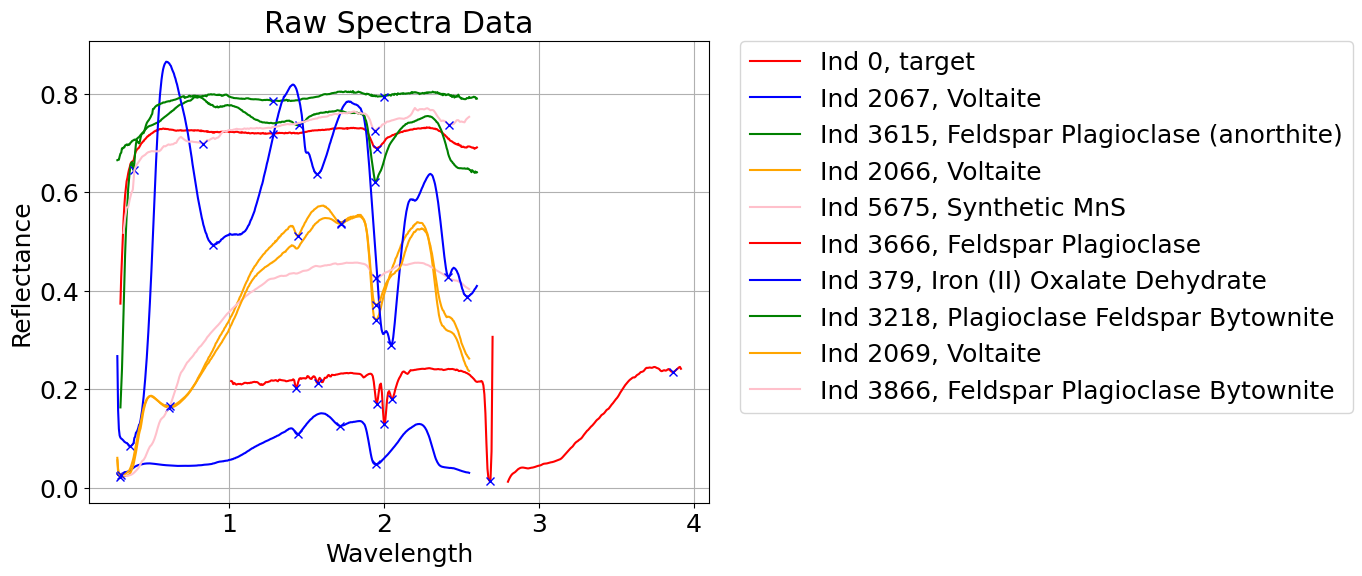

In [18]:
comparer.find_common_valley_indices()
df = comparer.result()
target_df = df.query("index == 0")
library_df = df.query("index != 0")
library_df2 = library_df.copy()

library_df2 = library_df2[library_df2['Band'] > 50]  # More than 50 matching bands

library_df2 = library_df2.sort_values(by=sim_type, ascending=False)  # degree of similarity
# library_df2 = library_df2.sort_values(by="Band", ascending=False)  # Number of matching bands

library_df2 = pd.concat([target_df, library_df2])

index_list = library_df2.nlargest(10, sim_type).index
# index_list = library_df2.nsmallest(10, sim_type).index

comparer.plot(library_df2, index_list, 'raw', find='valley', prominence=0.01)